<h1>Text detection and classification prototype</h1>

<h3>spaCY</h3>
spaCy is a NLP API that helps in the classification of words by prociding pre trained models with the option of training out own model as an addition to it

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import spacy

In [3]:
nlp = spacy.load("en_core_web_md")

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

Presentation to show how the prototype works.

<strong>Steps Done:</strong>

1. Open the text file to the keywords, and document to be obfuscated

In [4]:
keyword_dict = {}
# open file storing all keywords
with open(
    "C:\\Users\\fooyu\\Desktop\\Year 3\\PSD\\obfuscation\\keywords.txt", "r"
) as file:
    for line in file:
        line_list = line.strip().split(",")
        keyword_dict[line_list[0]] = line[1]

nlp_keywords = [nlp(keyword) for keyword in keyword_dict.keys()]
nlp_keyword_token = []
for keyword_doc in nlp_keywords:
    for token in keyword_doc:
        nlp_keyword_token.append(token)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fooyu\\Desktop\\Year 3\\PSD\\obfuscation\\keywords.txt'

In [5]:
# open file storing the document
with open(
    "C:\\Users\\fooyu\\Desktop\\Year 3\\PSD\\obfuscation\\goldfinger.txt", "r"
) as f:
    text = f.read()

# use spaCy to classify the words in the document
doc = nlp(text)

out = []
seen = set()
for word in doc:
    if word.text not in seen:
        out.append(word)
    seen.add(word.text)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fooyu\\Desktop\\Year 3\\PSD\\obfuscation\\goldfinger.txt'

2. Detect and classify words by grouping them together using both the regex with lemma form (simplest form of a word) or the detection of entities using spacy

In [7]:
detected = []
print(len(seen))

445


In [8]:
# detection of words using lemma forms of words in the text and keywords
nlp_keyword_lemma = [k.lemma_ for k in nlp_keyword_token]

for token in doc:
    if token.lemma_ in nlp_keyword_lemma:
        if token.text.lower() not in detected:
            detected.append(token.text.lower())

In [17]:
# detection of words using entities in spacy
word_detection = []
for ent in doc.ents:
    #      remove all cardinal/useless numbers
    if ent.label != 397:
        similarity = 0
        k = None
        for keyword in nlp_keywords:
            if keyword.similarity(ent) > similarity and keyword.similarity(ent) > 0:
                similarity = keyword.similarity(ent)
                k = keyword
        if k is not None:

            word_detection.append((ent, k))
            if ent.text.lower() not in detected:
                detected.append(ent.text.lower())

C:\Users\fooyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  if __name__ == '__main__':


In [18]:
print(word_detection)

[(GOLDFINGER, Goldfinger), (Project Goldfinger, Goldfinger), (MI6, Goldfinger), (Kevlar, Ballistic protection), (1,500 kg, Passenger ejection), (30mph, Top speed), (30 mph, Top speed), (British, Machine guns), (Interior, Bodyshell colours), (Interior, Bodyshell colours), (Front, Top speed), (160cm, Top speed), (200cm, Top speed), (Drivetrain, Passenger seatbelt restraint), (400 Nm, Top speed), (150 mph, Top speed), (60mph, Top speed), (Gearbox, Top speed), (Radar, Ballistic protection), (External, Control location), (External, Control location), (5 minutes, Top speed), (60mph, Top speed), (Dashboard, Smoke screen), (MI6, Goldfinger), (Goldfinger, Goldfinger), (May 1963, Control location)]


3. Open the file containing keywords from manual obfuscation and the obfuscated words found before using spaCy

In [19]:
manual_obfuscate = []
unique = 0
with open("C:\\Users\\fooyu\\Desktop\\Year 3\\PSD\\obfuscation\\word.txt", "r") as f:
    for line in f:
        word = line.strip()
        if word not in manual_obfuscate:
            unique += 1
            manual_obfuscate.append(word.lower())

before = []
with open("C:\\Users\\fooyu\\Desktop\\Year 3\\PSD\\obfuscation\\before.txt", "r") as f:
    for line in f:
        word = line.strip()
        if word not in before:
            before.append(word.lower())

4. Define functions for calculating true positives, true negatives, false positives and false negatives

In [20]:
# for true positives
def true_positive_calc(detected, manual_obfuscate):
    true_pos = 0
    for word in manual_obfuscate:
        if word in detected:
            print(word)
            true_pos += 1
            continue
    #     print(true_pos)
    return true_pos


# for false positives
def false_positive_calc(detected, manual_obfuscate):
    false_pos = 0
    for word in detected:
        if word not in " ".join(manual_obfuscate):
            #             print(word)
            false_pos += 1
    return false_pos


# for false negatives


def false_negatives_calc(detected, manual_obfuscate):
    false_neg = 0
    for word in manual_obfuscate:
        for w in word.split(" "):
            if w not in " ".join(detected):
                false_neg += 1
                #                 print(word)
                break

    return false_neg

In [21]:
def calc_metrics(model, sample, doc):
    t_p = true_positive_calc(model, sample)
    f_p = false_positive_calc(model, sample)
    f_n = false_negatives_calc(model, sample)
    return [t_p, f_p, f_n]


def calc_accuracy(model, sample, doc):
    [t_p, f_p, f_n] = calc_metrics(model, sample, doc)
    return (t_p) / (t_p + f_p + f_n)

5. Visualise the difference using plots

In [25]:
before_spacy = calc_metrics(before, manual_obfuscate, doc)
after_spacy = calc_metrics(detected, manual_obfuscate, doc)
before_spacy_acc = calc_accuracy(before, manual_obfuscate, doc)
after_spacy_acc = calc_accuracy(detected, manual_obfuscate, doc)

# print(after_spacy, before_spacy)

# print(unique)

pursuit
silver-grey
gold
mechanism
oil
goldfinger
30mph
150 mph
protection
oil
top
goldfinger
goldfinger
goldfinger
pursuit
silver-grey
gold
mechanism
oil
goldfinger
30mph
150 mph
protection
oil
top
goldfinger
goldfinger
goldfinger


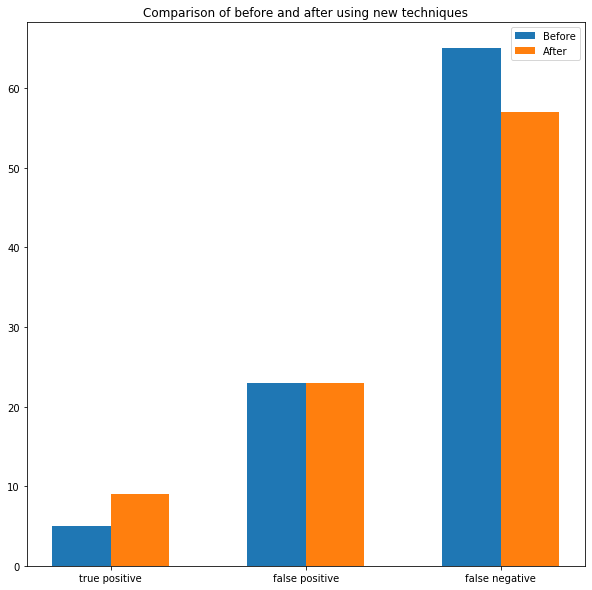

In [26]:
plt.figure(figsize=(10, 10))
ind = np.arange(3)
data1 = [before_spacy[0], before_spacy[1], before_spacy[2]]
data2 = [after_spacy[0], after_spacy[1], after_spacy[2]]
width = 0.3
plt.title("Comparison of before and after using new techniques")
plt.bar(np.arange(len(data1)), data1, width=width, label="Before")
plt.bar(np.arange(len(data2)) + width, data2, width=width, label="After")
plt.xticks(ind + width / 2, ("true positive", "false positive", "false negative"))
plt.legend(loc="best")
plt.show()

True Negative is not taken into account here as there isn't a real use for identifying true negatives since it is basically the whole document except those that are considered words for obfuscation in the example given. Using spaCy allows us to have a <strong>higher number of true positives (80% increase), lower false positive (17% decrease) and lower false negative (12% decrease)</strong>. 

Our next step would be to try to implement our own model using the example provided and prove that a system that evolves through time is possible. 

<strong>Main goal is to increase true positives and reduce false positives</strong>. Since the aim is to make a conservative model, reducing the number of false negatives isn't the main focus but it would be reduced as we improve the model.